In [1]:
import logging
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
RANDOM_SEED = 42
DATA_PATH = Path("../data/processed/coffee_health_cleaned.csv")  
OUTPUT_DIR = Path("../outputs/figures")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")
log = logging.getLogger("EDA")
np.random.seed(RANDOM_SEED)

In [3]:
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Preprocessed file not found: {DATA_PATH}")
df = pd.read_csv(DATA_PATH)
log.info(f"Loaded dataset for EDA with shape: {df.shape}")

target_candidates = [c for c in df.columns if "health" in c.lower() or "status" in c.lower() or "risk" in c.lower()]
target_col = target_candidates[0] if target_candidates else None
if not target_col:
    raise ValueError("Target column not found! Please set manually.")
log.info(f"Using target column: {target_col}")

INFO: Loaded dataset for EDA with shape: (10000, 16)


INFO: Using target column: Health_Issues



=== UNIVARIATE ANALYSIS ===


/tmp/ipykernel_169885/1461829783.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette="Set2")


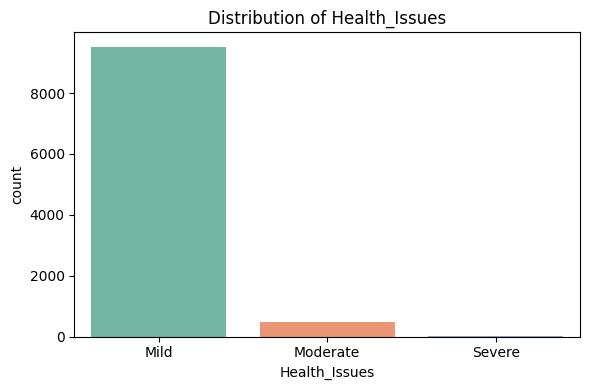

In [4]:
print("\n=== UNIVARIATE ANALYSIS ===")

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df, palette="Set2")
plt.title(f"Distribution of {target_col}")
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "target_distribution.png")
plt.show()

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"dist_{col}.png")
    plt.close()

In [6]:
print("\n=== BIVARIATE ANALYSIS ===")

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
    plt.title(f"{col} vs {target_col}")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"{col}_vs_target.png")
    plt.close()


=== BIVARIATE ANALYSIS ===


/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")


/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")


/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")


/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")


/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
/tmp/ipykernel_169885/2977653015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")


In [7]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    if col == target_col: 
        continue
    ct = pd.crosstab(df[col], df[target_col], normalize="index")
    ct.plot(kind="bar", stacked=True, figsize=(7,4), colormap="Set2")
    plt.title(f"{col} vs {target_col} (proportions)")
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"{col}_vs_target.png")
    plt.close()


=== CORRELATION ANALYSIS ===


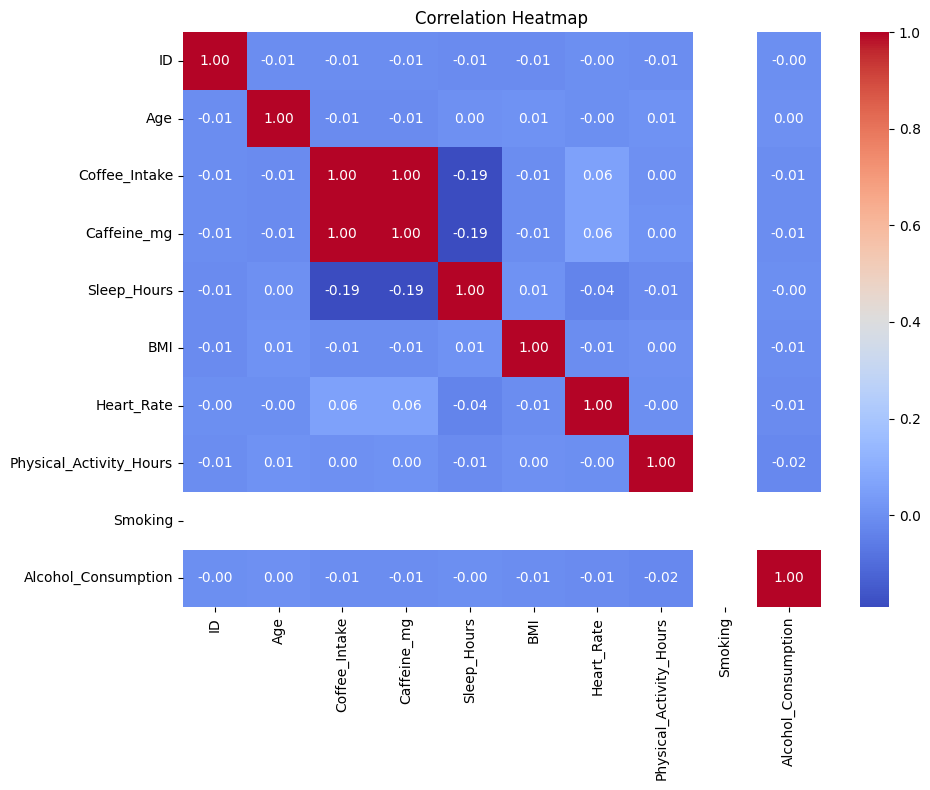

In [8]:
print("\n=== CORRELATION ANALYSIS ===")
if len(numeric_cols) >= 2:
    plt.figure(figsize=(10,8))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / "correlation_heatmap.png")
    plt.show()

In [9]:
print("\n=== FEATURE RELATIONSHIPS ===")

top_numeric = numeric_cols[:4]
sns.pairplot(df[top_numeric + [target_col]], hue=target_col, diag_kind="kde", palette="husl")
plt.savefig(OUTPUT_DIR / "pairplot.png")
plt.close()



=== FEATURE RELATIONSHIPS ===


In [10]:
summary = {
    "shape": df.shape,
    "target": target_col,
    "numeric_columns": numeric_cols,
    "categorical_columns": cat_cols,
    "eda_outputs": str(OUTPUT_DIR.resolve())
}
with open(OUTPUT_DIR / "eda_summary.json", "w") as f:
    json.dump(summary, f, indent=2)

print("\nEDA completed. Plots and summary saved in:", OUTPUT_DIR.resolve())



EDA completed. Plots and summary saved in: /home/Dhananjana/GitHub/coffee-minining/outputs/figures
